<a href="https://colab.research.google.com/github/AliceKitchkin/Unsupervised-Machine-Learning/blob/main/FifaPlayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Bibliotheken und Daten Import

In [318]:
# handle table-like data and matrices
import pandas as pd
import numpy as np

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# pca
from sklearn.decomposition import PCA

# clustering
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering

# evaluations
from sklearn.metrics import adjusted_rand_score, davies_bouldin_score, calinski_harabasz_score, silhouette_score

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

In [319]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [320]:
data_players = pd.read_csv("/content/drive/MyDrive/Bachelorarbeit/CSV/FifaPlayer.csv")

#Overview

In [321]:
data_players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png


In [322]:
data_players.shape

(19239, 110)

In [323]:
data_players.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,club_contract_valid_until,nationality_id,nation_team_id,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,19178.000000,19178.000000,19239.000000,759.000000,759.000000,19239.000000,19239.000000,19239.000000,1.806300e+04,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,20.945250,2022.764000,58.602682,14480.848485,12.567852,2.946151,2.352461,1.094184,5.374044e+06,68.213071,52.345297,57.312562,62.561174,51.703630,64.823289,49.577421,45.894433,51.783877,58.867977,42.463849,55.660429,47.268933,42.249025,53.072249,58.472010,64.652893,64.714902,63.500078,61.450023,64.068611,57.776860,64.813504,63.084880,65.007745,46.642705,55.538957,46.613545,50.330215,53.964603,47.858724,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,17.909369,1.213203,50.298614,35328.730217,7.039116,0.671560,0.767659,0.371098,1.494837e+07,10.933155,14.051623,10.068965,9.651312,16.189746,9.791886,18.034661,19.721023,17.294183,14.490858,17.653329,18.784590,18.181085,17.178590,15.026569,16.663722,15.167399,14.965426,14.862285,9.042281,14.324789,13.192224,12.122977,16.145279,12.663518,19.411583,16.972181,20.677077,19.621601,13.650481,15.768583,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,1.000000,2021.000000,1.000000,1318.000000,1.000000,1.000000,1.000000,1.000000,1.600000e+04,28.000000,18.000000,25.000000,27.000000,14.000000,29.000000,6.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,9.000000,8.000000,14.000000,15.000000,18.000000,25.000000,15.000000,20.000000,22.000000,12.000000,19.000000,4.000000,10.000000,3.000000,2.000000,10.000000,7.000000,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,9.000000,2022.000000,21.000000,1338.000000,7.000000,3.000000,2.000000,1.000000,8.060000e+05,62.000000,42.000000,51.000000,57.000000,37.000000,59.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,35.000000,31.000000,44.000000,55.000000,57.000000,58.000000,55.000000,56.000

In [324]:
#get only the columns
data_players.describe().columns

Index(['sofifa_id', 'overall', 'potential', 'value_eur', 'wage_eur', 'age',
       'height_cm', 'weight_kg', 'club_team_id', 'league_level',
       'club_jersey_number', 'club_contract_valid_until', 'nationality_id',
       'nation_team_id', 'nation_jersey_number', 'weak_foot', 'skill_moves',
       'international_reputation', 'release_clause_eur', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision

#Handling Missing Values

In [325]:
#before drop
data_players.isna().sum()

sofifa_id               0
player_url              0
short_name              0
long_name               0
player_positions        0
                    ...  
player_face_url         0
club_logo_url          61
club_flag_url          61
nation_logo_url     18480
nation_flag_url         0
Length: 110, dtype: int64

In [326]:
#dropna on specific columns
data_players = data_players.dropna(subset=features)

In [327]:
#after drop
data_players.isna().sum()

sofifa_id               0
player_url              0
short_name              0
long_name               0
player_positions        0
                    ...  
player_face_url         0
club_logo_url           0
club_flag_url           0
nation_logo_url     18467
nation_flag_url         0
Length: 110, dtype: int64

#Feature Scaling

In [328]:
#columns to use for clustering
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [329]:
#copy specific columns from the original dataset
data = data_players[features].copy()

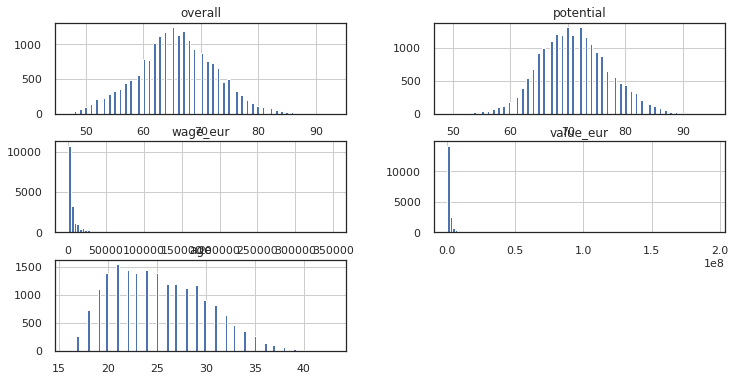

In [330]:
#data before scaling
data_players[features].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2));

In [331]:
#Scaling with minMaxScaler from 1 to 10
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
df_data_scaled = pd.DataFrame(data_scaled, columns=features)

In [332]:
#after scaling
df_data_scaled.head()

,overall,potential,wage_eur,value_eur,age
0,1.000000,0.956522,0.914163,0.402034,0.666667
1,0.978261,0.934783,0.771102,0.615962,0.592593
2,0.956522,0.913043,0.771102,0.231923,0.740741
3,0.956522,0.913043,0.771102,0.664933,0.481481
4,0.956522,0.913043,1.000000,0.646891,0.518519


In [333]:
#after scaling
df_data_scaled.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,0.407830,0.480000,0.024383,0.014647,0.340372
std,0.149626,0.132342,0.055725,0.039248,0.175093
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.304348,0.391304,0.001431,0.002402,0.185185
50%,0.413043,0.478261,0.007153,0.004980,0.333333
75%,0.500000,0.565217,0.021459,0.010263,0.481481
max,1.000000,1.000000,1.000000,1.000000,1.000000


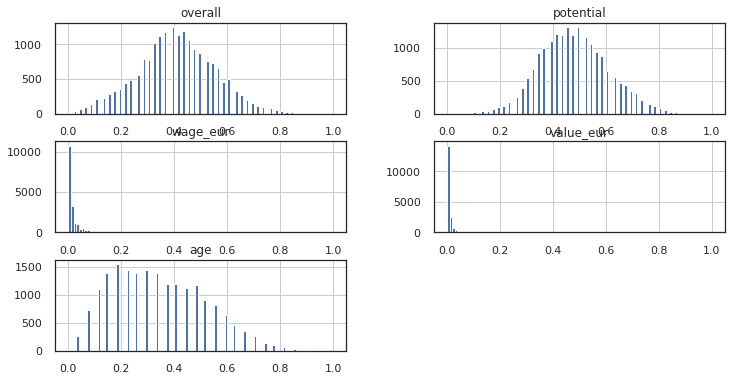

In [334]:
#after scaling
df_data_scaled.hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2));

#PCA

PCA to visualize 5 features (the 5 columns from the data above) in a 2 dimension plot (5D to 2D)

In [335]:
pca = PCA(n_components=2) #2D for the plot
data_2d = pd.DataFrame(pca.fit_transform(data_scaled)) #runs the model on the data
# data_2d = pca.fit_transform(df_data_scaled) #runs the model on the data

In [336]:
# plt.title("PCA 2D")
# plt.scatter(x=data_2d[:,0], y=data_2d[:,1],)
# plt.show()

#Clustering

##Elbow Method

To find the optimal number of cluster

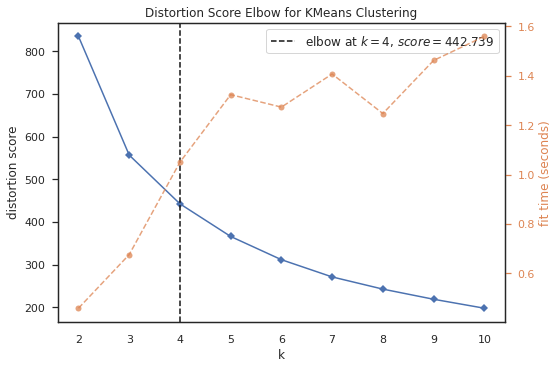

In [337]:
elbow = KElbowVisualizer(KMeans(), k=10)
elbow.fit(data_2d)
elbow.show()

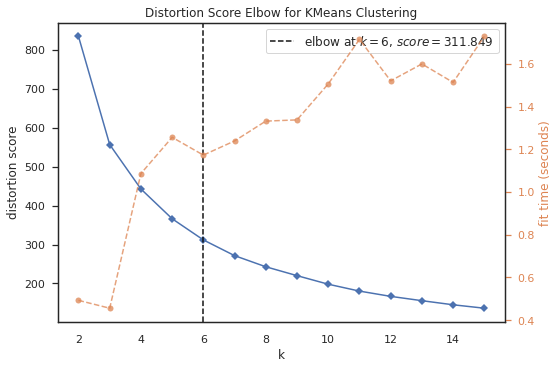

In [338]:
elbow15 = KElbowVisualizer(KMeans(), k=15)
elbow15.fit(data_2d)
elbow15.show()

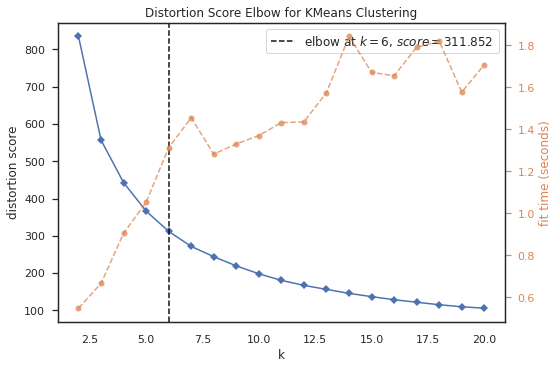

In [339]:
elbow20 = KElbowVisualizer(KMeans(), k=20)
elbow20.fit(data_2d)
elbow20.show()

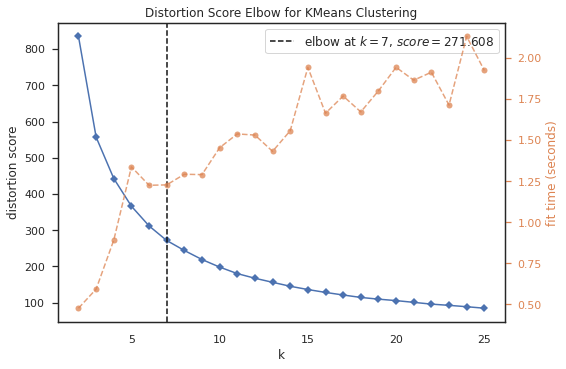

In [340]:
elbow25 = KElbowVisualizer(KMeans(), k=25)
elbow25.fit(data_2d)
elbow25.show()

##Silhouette Score

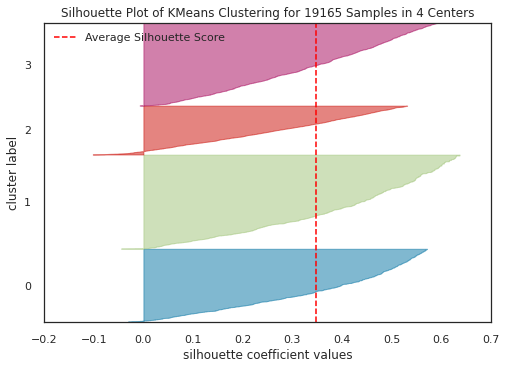

In [341]:
kmeans4 = KMeans(n_clusters = 4, random_state=42)
visualizer4 = SilhouetteVisualizer(kmeans4, colors='yellowbrick')
visualizer4.fit(data_2d)

visualizer4.show()

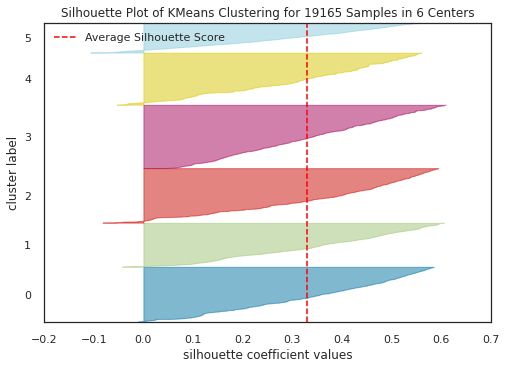

In [342]:
kmeans6 = KMeans(n_clusters = 6, random_state=42)
visualizer6 = SilhouetteVisualizer(kmeans6, colors='yellowbrick')
visualizer6.fit(data_2d)

visualizer6.show()

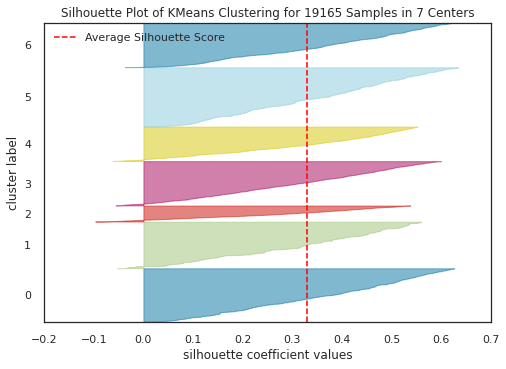

In [343]:
kmeans7 = KMeans(n_clusters = 7, random_state=42)
visualizer7 = SilhouetteVisualizer(kmeans7, colors='yellowbrick')
visualizer7.fit(data_2d)

visualizer7.show()

##K-Means

In [353]:
#specify the number of clusters we got from silhouette score
kmeans = KMeans(n_clusters=5)

In [354]:
#fit the scaled data
kmeans = kmeans.fit(data_2d)

In [355]:
#get the cluster labels
labels = kmeans.predict(data_2d)

In [356]:
#get the centroid values
centroids = kmeans.cluster_centers_

In [357]:
#get the cluster values
clusters = kmeans.labels_.tolist()

##Visualization

In [358]:
data_v = data_2d.copy()

In [359]:
#add new column for cluster
data_v['cluster'] = clusters

#add new column for player names
names = data_players.short_name.tolist()
data_v['name'] = names

data_v.columns = ['x', 'y', 'cluster', 'name']

In [360]:
data_v.head()

,x,y,cluster,name
0,0.881925,0.510924,4,L. Messi
1,0.808389,0.536323,4,R. Lewandowski
2,0.860896,0.383340,4,Cristiano Ronaldo
3,0.715907,0.584769,4,Neymar Jr
4,0.772876,0.591308,4,K. De Bruyne


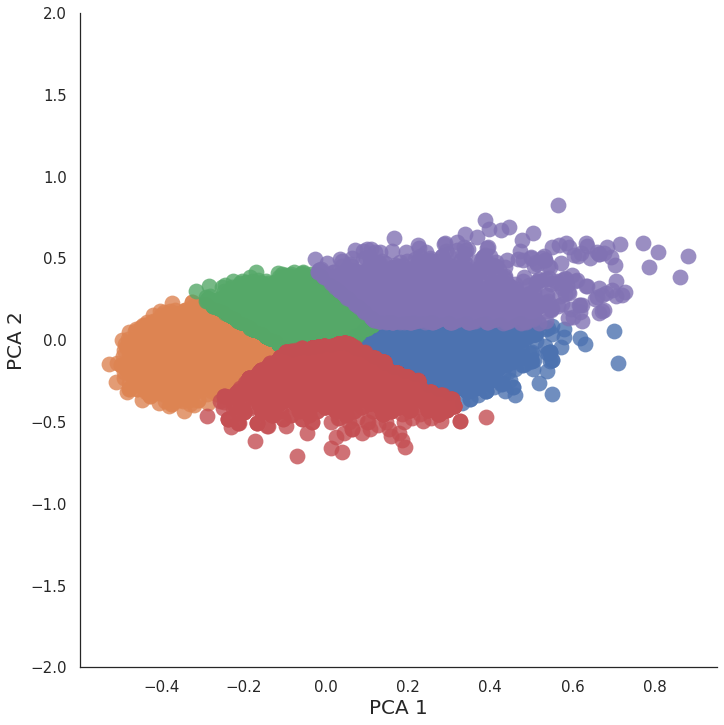

In [361]:
sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue="cluster", data=data_v, legend=False, fit_reg=False, size=10, scatter_kws={'s':250})

# texts = []
# for x, y, n in zip (data_v.x, data_v.y, data_v.name):
#   texts.append(plt.text(x, y, n))

ax.set(ylim=(-2,2))
plt.tick_params(labelsize=15)
plt.xlabel("PCA 1", fontsize=20)
plt.ylabel("PCA 2", fontsize=20)

plt.show()